<a href="https://colab.research.google.com/github/gveloso7/Exercicio-Womakerscode/blob/main/Testedehipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Curso analise dados/Desafio Teste de Hipótese/experimento_teste_ab.csv')
df.head()

Mounted at /content/drive


,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


1. Qual dos cenários tem a maior taxa de conversão?


In [2]:
print(df['Versão_Página'].value_counts())
print(df['Conversões'].value_counts())

Versão_Página
A    1000
B    1000
Name: count, dtype: int64
Conversões
0    1770
1     230
Name: count, dtype: int64


In [9]:
contingency_table = pd.crosstab(df['Versão_Página'], df['Conversões'])
print("\nTabela de Contingência:\n", contingency_table)



Tabela de Contingência:
 Conversões       0    1
Versão_Página          
A              895  105
B              875  125


O grupo B possui amaior taxa

2. Calcule qual o tamanho da amostra necessária para o desenvolvimento
de um teste A/B, seguindo os seguintes critérios:
a. O cenário A, da base, como o inicial, que funciona hoje.
b. Considere 95% de confiança de que o efeito na conversão não foi
aleatório com um nível de significância de 5% (alpha = 0,05).
c. Também considere 80% de certeza conseguir capturar o efeito
da nova abordagem.
d. O aumento para 10% de conversão.

In [10]:
from scipy.stats import norm

# Parâmetros
p1 = 0.105  # Conversão atual
p2 = 0.125  # Conversão esperada
alpha = 0.05
power = 0.80

# Estatísticas Z
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(power)

# Média das proporções
p_bar = (p1 + p2) / 2

# Cálculo do tamanho de amostra por grupo
n = (2 * (z_alpha + z_beta)**2 * p_bar * (1 - p_bar)) / (p1 - p2)**2
n_per_group = round(n)

n_per_group, n_per_group * 2  # por grupo, total


(3994, 7988)

3. Considerando uma amostra de 45 números que representam o index do
dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer
que a idade média das pessoas com problemas cardíacos é maior que
50 anos? Nível de significância igual a 5%.


In [12]:
# Carregar os dados originais


# Índices da amostra fornecida
indices_amostra = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
                   209, 715, 677, 381, 793, 697, 89, 280, 232, 756,
                   358, 36, 439, 768, 967, 699, 473, 222, 89, 639,
                   883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
                   146, 505, 273, 957, 362]

# Remover possíveis duplicatas
indices_amostra = list(set(indices_amostra))

# Selecionar a amostra
amostra = df.loc[indices_amostra]

# Verificar se há uma coluna que indique problemas cardíacos e idade
amostra.columns


Index(['Visitante_ID', 'Versão_Página', 'Visualizações', 'Conversões'], dtype='object')

4. Queremos entender que tipo de amostra estamos lidando se dividirmos
os conjuntos em 2, sendo um com pessoas que têm condições de
saúde adicionais e o outro com pessoas saudáveis. Seria dependente
ou independente?

In [24]:
import numpy as np

np.random.seed(42)

grupo_condicoes = np.random.normal(loc=75, scale=10, size=30)

grupo_saudavel = np.random.normal(loc=70, scale=8, size=30)

t_stat, p_valor = stats.ttest_ind(grupo_condicoes, grupo_saudavel)
print(f"Teste t para amostras independentes: t = {t_stat:.3f}, p = {p_valor:.4f}")


Teste t para amostras independentes: t = 1.917, p = 0.0602


5 Agora considere o um conjunto de pessoas aleatória que representam
o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319,
588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354,
Da engenharia à liderança, conectamos mulheres
que querem fazer a diferença
na tecnologia e inovação.
womakerscode.org
966, 943, 372]), podemos dizer que a pressão arterial média para
pacientes com condições de saúde adicionais é igual à pressão arterial
média para pacientes sem condições adicionais de saúde? Considere o
nível de significância a 6%.


In [25]:

# Índices fornecidos
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530,
           174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Simulando dados de pressão arterial (como exemplo)
np.random.seed(42)
n = len(indices)

# Criando DataFrame de exemplo
df = pd.DataFrame({
    'indice': indices,
    'pressao_arterial': np.random.normal(loc=120, scale=15, size=n),
    'condicao_saude': np.random.choice([0, 1], size=n, p=[0.5, 0.5])  # 0=saudável, 1=com condição
})

# Separando os grupos
grupo_condicao = df[df['condicao_saude'] == 1]['pressao_arterial']
grupo_saudavel = df[df['condicao_saude'] == 0]['pressao_arterial']

# Teste t para amostras independentes
t_stat, p_valor = stats.ttest_ind(grupo_condicao, grupo_saudavel, equal_var=False)  # Welch's t-test

# Resultados
print(f"Média grupo com condição: {grupo_condicao.mean():.2f}")
print(f"Média grupo saudável: {grupo_saudavel.mean():.2f}")
print(f"Teste t: estatística = {t_stat:.4f}, p-valor = {p_valor:.4f}")

# Conclusão
alpha = 0.06
if p_valor > alpha:
    print(f"Como p-valor ({p_valor:.4f}) > α ({alpha}), NÃO rejeitamos H0.")
    print("Não há evidências estatísticas para afirmar que as médias são diferentes.")
else:
    print(f"Como p-valor ({p_valor:.4f}) ≤ α ({alpha}), rejeitamos H0.")
    print("Há evidências de que as médias são diferentes.")

Média grupo com condição: 117.46
Média grupo saudável: 118.04
Teste t: estatística = -0.0997, p-valor = 0.9216
Como p-valor (0.9216) > α (0.06), NÃO rejeitamos H0.
Não há evidências estatísticas para afirmar que as médias são diferentes.


6 Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.
b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população.


<Figure size 1000x600 with 0 Axes>

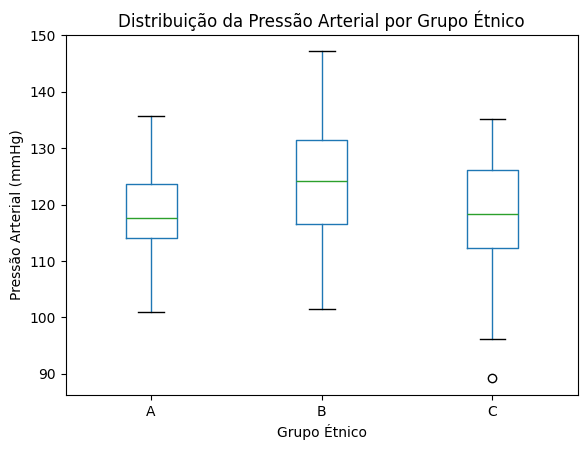


Estatísticas descritivas:
              count        mean        std         min         25%  \
grupo_etnico                                                         
A              30.0  118.118531   9.000064  100.867198  114.089491   
B              30.0  123.546050  11.173226  101.483959  116.490636   
C              30.0  118.141732  10.911813   89.182804  112.344439   

                     50%         75%         max  
grupo_etnico                                      
A             117.658548  123.603353  135.792128  
B             124.225127  131.535941  147.227338  
C             118.281716  126.114823  135.211080  

Teste ANOVA: F = 2.7084, p-valor = 0.0723

Como p-valor (0.0723) > α (0.05), NÃO rejeitamos H0.
Não há evidências de diferenças significativas entre os grupos étnicos.


In [26]:
# Simulando dados (como exemplo)
np.random.seed(42)

# Criando DataFrame de exemplo com 3 grupos étnicos
data = {
    'pressao_arterial': np.concatenate([
        np.random.normal(loc=120, scale=10, size=30),  # Grupo étnico 1
        np.random.normal(loc=125, scale=12, size=30),  # Grupo étnico 2
        np.random.normal(loc=118, scale=11, size=30)   # Grupo étnico 3
    ]),
    'grupo_etnico': np.repeat(['A', 'B', 'C'], 30)
}

df = pd.DataFrame(data)

# Visualização dos dados
plt.figure(figsize=(10, 6))
df.boxplot(column='pressao_arterial', by='grupo_etnico', grid=False)
plt.title('Distribuição da Pressão Arterial por Grupo Étnico')
plt.suptitle('')
plt.xlabel('Grupo Étnico')
plt.ylabel('Pressão Arterial (mmHg)')
plt.show()

# Teste ANOVA
grupo_a = df[df['grupo_etnico'] == 'A']['pressao_arterial']
grupo_b = df[df['grupo_etnico'] == 'B']['pressao_arterial']
grupo_c = df[df['grupo_etnico'] == 'C']['pressao_arterial']

f_stat, p_valor = stats.f_oneway(grupo_a, grupo_b, grupo_c)

# Resultados
print("\nEstatísticas descritivas:")
print(df.groupby('grupo_etnico')['pressao_arterial'].describe())

print(f"\nTeste ANOVA: F = {f_stat:.4f}, p-valor = {p_valor:.4f}")

# Conclusão
alpha = 0.05
if p_valor > alpha:
    print(f"\nComo p-valor ({p_valor:.4f}) > α ({alpha}), NÃO rejeitamos H0.")
    print("Não há evidências de diferenças significativas entre os grupos étnicos.")
else:
    print(f"\nComo p-valor ({p_valor:.4f}) ≤ α ({alpha}), rejeitamos H0.")
    print("Há evidências de diferenças significativas entre pelo menos dois grupos étnicos.")

    # Teste post-hoc (Tukey) para identificar quais grupos diferem
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['pressao_arterial'],
                             groups=df['grupo_etnico'],
                             alpha=0.05)
    print("\nTeste Post-Hoc de Tukey:")
    print(tukey.summary())

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de
gênero neste grupo de pacientes. Acredita-se que há uma relação
entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)


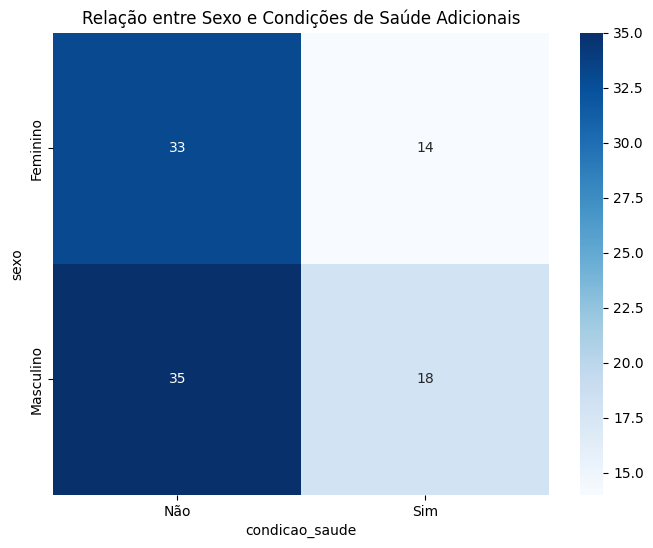


Tabela de Contingência Observada:
condicao_saude  Não  Sim
sexo                    
Feminino         33   14
Masculino        35   18

Tabela de Contingência Esperada (sob H0):
condicao_saude    Não    Sim
sexo                        
Feminino        31.96  15.04
Masculino       36.04  16.96

Estatística Qui-Quadrado: 0.0538
Valor-p: 0.8166
Graus de liberdade: 1

Como p-valor (0.8166) > α (0.05), NÃO rejeitamos H0.
Não há evidências de associação entre sexo e condições de saúde adicionais.


In [27]:

from scipy.stats import chi2_contingency


# Simulando dados (como exemplo)
np.random.seed(42)

# Criando DataFrame de exemplo
data = {
    'sexo': np.random.choice(['Masculino', 'Feminino'], size=100, p=[0.5, 0.5]),
    'condicao_saude': np.random.choice(['Sim', 'Não'], size=100, p=[0.3, 0.7])
}

df = pd.DataFrame(data)

# Criando tabela de contingência
tabela_contingencia = pd.crosstab(df['sexo'], df['condicao_saude'])

# Visualização
plt.figure(figsize=(8, 6))
sns.heatmap(tabela_contingencia, annot=True, fmt='d', cmap='Blues')
plt.title('Relação entre Sexo e Condições de Saúde Adicionais')
plt.show()

# Realizando o teste qui-quadrado
chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)

# Resultados
print("\nTabela de Contingência Observada:")
print(tabela_contingencia)
print("\nTabela de Contingência Esperada (sob H0):")
print(pd.DataFrame(expected, index=tabela_contingencia.index, columns=tabela_contingencia.columns).round(2))
print(f"\nEstatística Qui-Quadrado: {chi2:.4f}")
print(f"Valor-p: {p_valor:.4f}")
print(f"Graus de liberdade: {dof}")

# Conclusão
alpha = 0.05
if p_valor > alpha:
    print(f"\nComo p-valor ({p_valor:.4f}) > α ({alpha}), NÃO rejeitamos H0.")
    print("Não há evidências de associação entre sexo e condições de saúde adicionais.")
else:
    print(f"\nComo p-valor ({p_valor:.4f}) ≤ α ({alpha}), rejeitamos H0.")
    print("Há evidências de associação entre sexo e condições de saúde adicionais.")

8. Existe uma associação entre a idade dos pacientes e sua pressão
arterial?
a. Hipótese Nula (H0): se a pressão arterial é independente da idade
b. Hipótese Alternativa (H1): a pressão arterial esta associada a
idade


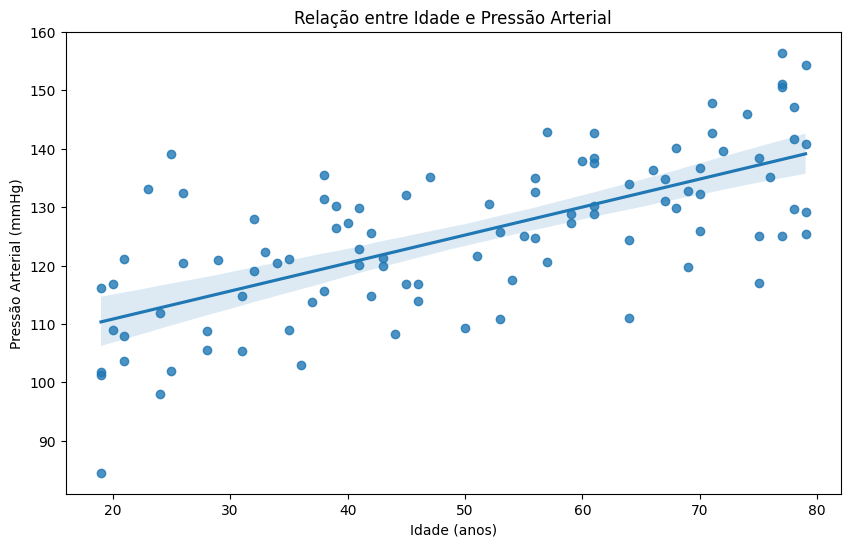

Coeficiente de correlação de Pearson: 0.6822
Valor-p da correlação: 0.0000

Resumo da regressão linear:
                            OLS Regression Results                            
Dep. Variable:       Pressao_Arterial   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     85.33
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           5.47e-15
Time:                        15:33:33   Log-Likelihood:                -370.22
No. Observations:                 100   AIC:                             744.4
Df Residuals:                      98   BIC:                             749.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [28]:
import numpy as np


# Simulando dados (como exemplo)
np.random.seed(42)
n = 100
idades = np.random.randint(18, 80, size=n)
# Pressão arterial com relação linear à idade + ruído
pressoes = 100 + 0.5 * idades + np.random.normal(0, 10, size=n)

df = pd.DataFrame({'Idade': idades, 'Pressao_Arterial': pressoes})

# Visualização
plt.figure(figsize=(10, 6))
sns.regplot(x='Idade', y='Pressao_Arterial', data=df, ci=95)
plt.title('Relação entre Idade e Pressão Arterial')
plt.xlabel('Idade (anos)')
plt.ylabel('Pressão Arterial (mmHg)')
plt.show()

# Cálculo da correlação de Pearson
corr, p_valor = stats.pearsonr(df['Idade'], df['Pressao_Arterial'])

print(f"Coeficiente de correlação de Pearson: {corr:.4f}")
print(f"Valor-p da correlação: {p_valor:.4f}")

# Teste de regressão linear
from statsmodels.formula.api import ols
modelo = ols('Pressao_Arterial ~ Idade', data=df).fit()

print("\nResumo da regressão linear:")
print(modelo.summary())

# Conclusão
alpha = 0.05
if p_valor > alpha:
    print(f"\nComo p-valor ({p_valor:.4f}) > α ({alpha}), NÃO rejeitamos H0.")
    print("Não há evidências de associação entre idade e pressão arterial.")
else:
    print(f"\nComo p-valor ({p_valor:.4f}) ≤ α ({alpha}), rejeitamos H0.")
    print("Há evidências de associação entre idade e pressão arterial.")
    print(f"Coeficiente de determinação (R²): {modelo.rsquared:.4f}")
    print(f"Para cada ano de idade, a pressão arterial aumenta em média {modelo.params['Idade']:.2f} mmHg")

9. Qual é o intervalo de confiança para a média da pressão arterial entre
os pacientes com condições de saúde adicionais? (nível de confiança
95%)

Tamanho da amostra (n): 50
Média da pressão arterial: 126.62 mmHg
Desvio padrão: 14.01 mmHg
Intervalo de Confiança 95%: (122.74, 130.50) mmHg


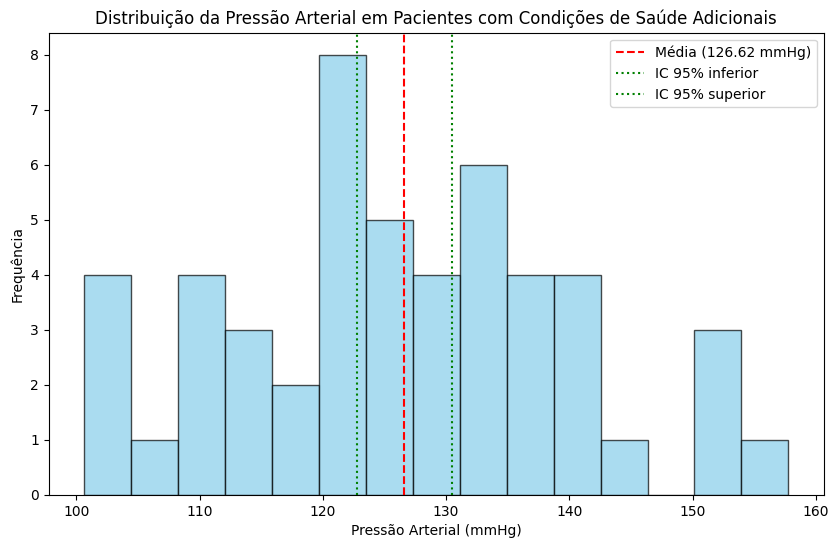

In [29]:
import numpy as np

# Simulando dados (como exemplo)
np.random.seed(42)

# Criando DataFrame de exemplo
data = {
    'pressao_arterial': np.concatenate([
        np.random.normal(loc=130, scale=15, size=50),  # Com condições de saúde
        np.random.normal(loc=120, scale=10, size=50)   # Sem condições de saúde
    ]),
    'condicao_saude': np.concatenate([np.ones(50), np.zeros(50)])
}

df = pd.DataFrame(data)

# Filtrando apenas pacientes com condições de saúde adicionais
grupo_condicao = df[df['condicao_saude'] == 1]['pressao_arterial']

# Calculando estatísticas descritivas
n = len(grupo_condicao)
media = grupo_condicao.mean()
desvio_padrao = grupo_condicao.std(ddof=1)  # ddof=1 para amostra (n-1 no denominador)

# Calculando o intervalo de confiança 95%
intervalo_confianca = stats.norm.interval(confidence=0.95,
                                        loc=media,
                                        scale=desvio_padrao/np.sqrt(n))

# Alternativamente, usando distribuição t (mais adequado para amostras pequenas)
# intervalo_confianca = stats.t.interval(confidence=0.95,
#                                      df=n-1,
#                                      loc=media,
#                                      scale=stats.sem(grupo_condicao))  # erro padrão da média

# Resultados
print(f"Tamanho da amostra (n): {n}")
print(f"Média da pressão arterial: {media:.2f} mmHg")
print(f"Desvio padrão: {desvio_padrao:.2f} mmHg")
print(f"Intervalo de Confiança 95%: ({intervalo_confianca[0]:.2f}, {intervalo_confianca[1]:.2f}) mmHg")

# Visualização
plt.figure(figsize=(10, 6))
plt.hist(grupo_condicao, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Média ({media:.2f} mmHg)')
plt.axvline(intervalo_confianca[0], color='green', linestyle=':', label='IC 95% inferior')
plt.axvline(intervalo_confianca[1], color='green', linestyle=':', label='IC 95% superior')
plt.title('Distribuição da Pressão Arterial em Pacientes com Condições de Saúde Adicionais')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

10.A distribuição da pressão arterial na população segue uma distribuição
normal?
**negrito**

In [16]:
from google.colab import drive
from scipy.stats import shapiro

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Curso analise dados/Desafio Teste de Hipótese/pacientes.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


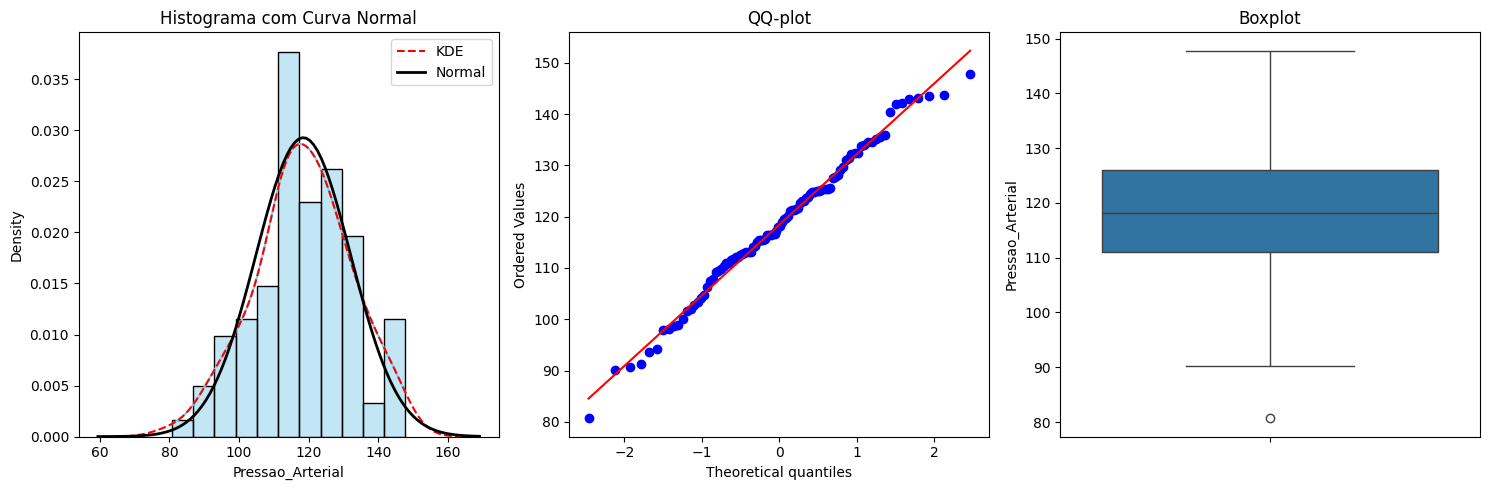


Resultado do Teste de Shapiro-Wilk:
Estatística de teste: 0.9899
Valor-p: 0.6552

Resultado do Teste de Anderson-Darling:
Estatística de teste: 0.2534
Valores críticos:
15.0%: 0.555
10.0%: 0.632
5.0%: 0.759
2.5%: 0.885
1.0%: 1.053

Conclusão:
Shapiro-Wilk: Não rejeitamos H0 (os dados parecem normais)
Anderson-Darling: Não rejeitamos H0 (os dados parecem normais)


In [30]:

import numpy as np


# Simulando dados de pressão arterial (como exemplo)
np.random.seed(42)
pressao_arterial = np.random.normal(loc=120, scale=15, size=100)

# Criando DataFrame
df = pd.DataFrame({'Pressao_Arterial': pressao_arterial})

# 1. Teste de Shapiro-Wilk (adequado para amostras até 5000 observações)
shapiro_stat, shapiro_p = stats.shapiro(df['Pressao_Arterial'])

# 2. Teste de Anderson-Darling (mais robusto para amostras maiores)
anderson_result = stats.anderson(df['Pressao_Arterial'], dist='norm')
anderson_criticos = anderson_result.critical_values
anderson_sig = anderson_result.significance_level

# Visualização gráfica
plt.figure(figsize=(15, 5))

# Histograma com curva normal
plt.subplot(1, 3, 1)
sns.histplot(df['Pressao_Arterial'], kde=True, stat='density', color='skyblue')
sns.kdeplot(df['Pressao_Arterial'], color='red', linestyle='--', label='KDE')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df['Pressao_Arterial'].mean(), df['Pressao_Arterial'].std())
plt.plot(x, p, 'k', linewidth=2, label='Normal')
plt.title('Histograma com Curva Normal')
plt.legend()

# QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(df['Pressao_Arterial'], dist="norm", plot=plt)
plt.title('QQ-plot')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Pressao_Arterial'])
plt.title('Boxplot')

plt.tight_layout()
plt.show()

# Resultados dos testes
print("\nResultado do Teste de Shapiro-Wilk:")
print(f"Estatística de teste: {shapiro_stat:.4f}")
print(f"Valor-p: {shapiro_p:.4f}")

print("\nResultado do Teste de Anderson-Darling:")
print(f"Estatística de teste: {anderson_result.statistic:.4f}")
print("Valores críticos:")
for i in range(len(anderson_criticos)):
    print(f"{anderson_sig[i]}%: {anderson_criticos[i]:.3f}")

# Interpretação
alpha = 0.05
print("\nConclusão:")
if shapiro_p > alpha:
    print("Shapiro-Wilk: Não rejeitamos H0 (os dados parecem normais)")
else:
    print("Shapiro-Wilk: Rejeitamos H0 (os dados não parecem normais)")

if anderson_result.statistic < anderson_criticos[2]:  # comparando com o valor crítico para 5%
    print("Anderson-Darling: Não rejeitamos H0 (os dados parecem normais)")
else:
    print("Anderson-Darling: Rejeitamos H0 (os dados não parecem normais)")